# Example: Regression using Mini-Batch Gradient Descent

In this example, we will demonstrate how to train a `QNNRegressor` using mini-batch gradient descent with the `Adam` optimizer.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevPQC
from squlearn.observables import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam

In [2]:
executor = Executor("pennylane")

## `QNNRegressor` Setup

We start by defining a parameterized quantum circuit (PQC)

c:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


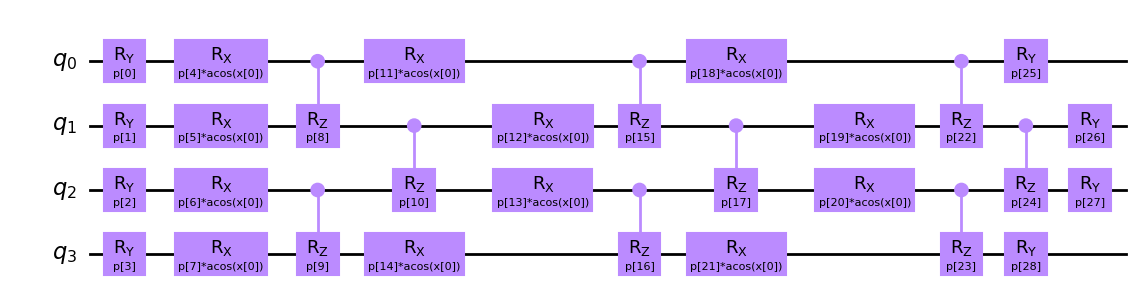

In [3]:
nqubits = 4
number_of_layers = 3

pqc = ChebyshevPQC(nqubits, 1, num_layers=number_of_layers, closed=False)
pqc.draw("mpl")

We also need an observable

In [4]:
cost_op = SummedPaulis(nqubits)
print(cost_op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


Now we can create the `QNNRegressor` with the PQC and cost operator. We also specify `SquaredLoss` and `Adam` as the loss function and optimizer respectively. Finally we specify initial parameters for both, the PQC and cost operator. For the `Adam` optimizer, we specify a maximum number of allowed iterations and a learning rate.

Additionally we specify a batch size, a number of epochs and wether the data should be shuffled before each epoch.

In [5]:
np.random.seed(13)
param_ini = np.array(
    [
        2.23077261,
        1.67662129,
        2.31907408,
        4.19653278,
        3.10988149,
        2.86854733,
        2.39268256,
        2.13592673,
        1.69101578,
        3.98640469,
        -0.03246431,
        1.80561025,
        -0.65537844,
        3.29117205,
        0.95821621,
        2.09460059,
        2.08966305,
        2.75348927,
        -1.01622063,
        2.03353887,
        3.80263775,
        0.97692296,
        1.45762312,
        3.63602452,
        1.49145258,
        0.54122952,
        1.6576827,
        2.30712431,
        -0.65223123,
    ]
)
param_op_ini = np.array([-0.03604716, 0.18062361, 0.28757131, 0.67711737, 1.30880319])

ADAM = Adam({"lr": 0.1})

reg = QNNRegressor(
    pqc,
    cost_op,
    executor,
    SquaredLoss(),
    ADAM,
    param_ini,
    param_op_ini,
    batch_size=10,
    epochs=10,
    shuffle=True,
)

## Training

Now we are ready to train the model to fit the logarithm funciton

In [6]:
x_space = np.arange(0.1, 0.9, 0.01)
ref_values = np.log(x_space)

reg.fit(x_space, ref_values)

fit: 100%|██████████| 10/10 [00:28<00:00,  2.88s/it]


## Evaluation

Let's check the trained parameters of the PQC and operator

In [7]:
print("Result PQC params:", reg.param)
print("Result operator params:", reg.param_op)

Result PQC params: [ 2.37822561  1.74216152  2.40036633  4.15878256  3.31502176  3.04300252
  1.90361467  2.03596528  1.62033134  3.95251982 -0.04618423  1.82219304
 -0.36285139  3.18089453  1.05261221  2.11643869  2.08093605  2.68189581
 -1.21642594  2.11392671  3.86721639  1.01012598  1.57103423  3.7907013
  1.66451429  0.00753889  1.18658542  2.55331333 -0.56834487]
Result operator params: [-0.17705309  0.07482022  0.41418931  0.73202703  1.20884947]


Also let's plot the predicted function vs. the actual logarithm function

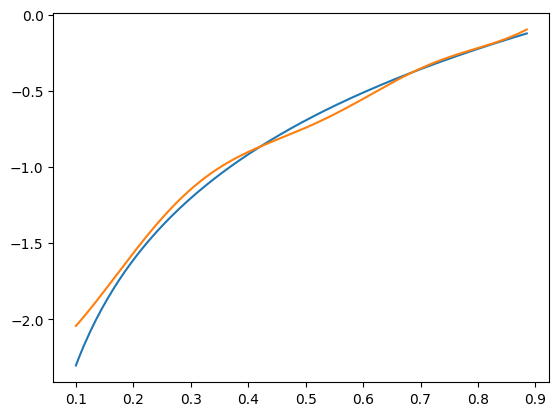

In [8]:
x = np.arange(np.min(x_space), np.max(x_space), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)